# ***TALLER 1 - PROBABILIDAD Y ESTADISTICA 2025 - 1***
***Integrantes:***

*Johanna Katterine Moreno Angarita - 1011082851*

*William David Hernandez García - 1021668893*

*Sebastián Rincón Castiblanco -1024476769*



---



In [ ]:
!pip install kagglehub[pandas-datasets]

In [ ]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Carga del dataset
df = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "aldol07/socioeconomic-factors-and-income-dataset",
    "sgdata.csv"
)

df.head()


<ipython-input-2-012f6bc0bcd9>:5: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  df = kagglehub.load_dataset(


,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,single,67,university,124670,skilled employee / official,2
1,100000002,1,non-single (divorced / separated / married / w...,22,high school,150773,skilled employee / official,2
2,100000003,0,single,49,high school,89210,unemployed / unskilled,0
3,100000004,0,single,45,high school,171565,skilled employee / official,1
4,100000005,0,single,53,high school,149031,skilled employee / official,1


In [ ]:
import pandas as pd
import numpy as np

n = 50 # tamaño de la muestra
seed = 179 # semilla asignada

rng = np.random.default_rng(seed)

m1 = df.sample(n=n, random_state=rng.integers(0,1_000_000))#esta es la muestra 1
m2 = df.sample(n=n, random_state=rng.integers(0,1_000_000))#esta es la muestra 2


In [ ]:
m1.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
1895,100001896,0,single,26,other / unknown,83442,unemployed / unskilled,0
1367,100001368,1,non-single (divorced / separated / married / w...,29,high school,99556,skilled employee / official,0
645,100000646,0,single,27,other / unknown,158147,skilled employee / official,2
694,100000695,0,single,28,other / unknown,104263,skilled employee / official,1
1470,100001471,1,non-single (divorced / separated / married / w...,27,high school,64472,unemployed / unskilled,0


In [ ]:
m2.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
1241,100001242,0,single,52,high school,151947,management / self-employed / highly qualified ...,2
739,100000740,1,non-single (divorced / separated / married / w...,26,high school,121423,unemployed / unskilled,0
1228,100001229,0,single,34,high school,97474,management / self-employed / highly qualified ...,2
1836,100001837,1,single,33,other / unknown,69523,unemployed / unskilled,0
526,100000527,1,non-single (divorced / separated / married / w...,31,high school,120030,skilled employee / official,0


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# ***1. Representaciones Gráficas***


---



##**1.1  Gráficos de barras** - *Distribución de niveles educativos*

In [ ]:
#@title - *Código de las gráficas de barras*
def grafico_barras_educacion(data, titulo, color='color'):
    orden_niveles = ['other / unknown', 'high school', 'university', 'graduate school']
    plt.figure(figsize=(6, 4))
    sns.countplot(data=data, x='Education', order=orden_niveles, color=color)
    plt.title(f"Niveles educativos - {titulo}", fontweight='bold', fontstyle='italic')
    plt.xticks(rotation=0)
    plt.xlabel("Nivel educativo", fontweight='bold')
    plt.ylabel("Frecuencia", fontweight='bold')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()


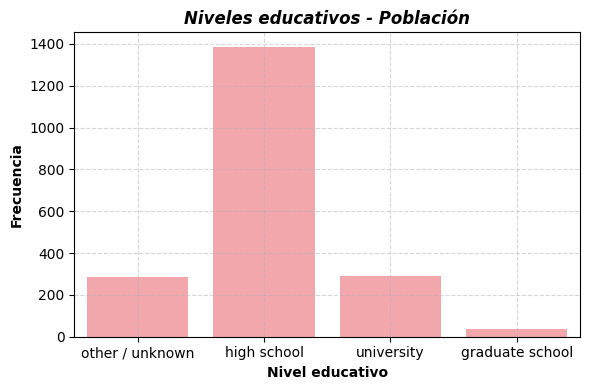

In [ ]:
grafico_barras_educacion(df, "Población", color='#FF9AA2')

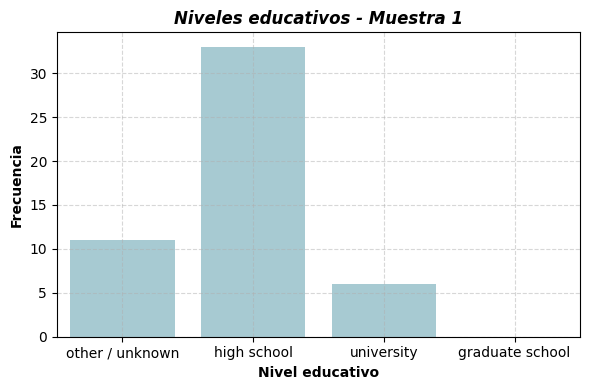

In [ ]:
grafico_barras_educacion(m1, "Muestra 1", color= '#A0CED9')

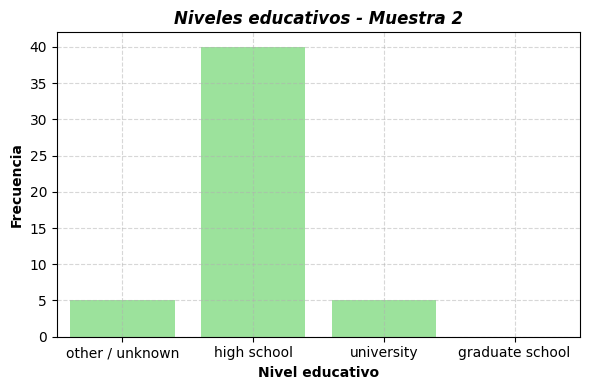

In [ ]:
grafico_barras_educacion(m2, "Muestra 2", color='#90EE90')

*  ### **¿Qué nivel educativo es predominante?**
Tanto para toda la población como para cada una de las muestras el nivel predominante es **high school** (bachillerato)



*   ### **¿Qué razones socioeconómicas podrían explicar esta distribución?**
Esta distribución puede deberse a muchos factores estructurales y contextuales, principalmente consideramos:

*   **Costos directos e indirectos de la educación superior:** Tanto para universidades públicas como privadas, se debe contar con una buena cantidad de recursos económicos, esto representa una barrera significativa para gran parte de la población.

*   **Brechas territoriales:** Suelen afectar especialmente a poblaciones rurales, o periféricas, donde la oferta de instituciones es limitada o inexistente.

*   **Necesidad de ingreso temprano al mercado laboral:** El bachilletato suele ser suficiente para entrar al mercado informal, lo que lleva a priorizar el trabajo frente al estudio.

  Por ejemplo, en el contexto colombiano, la educación superior sigue siendo un privilegio. En una sociedad dónde el titulo universitario no siempre garantiza mejores ingresos o condiciones laborales, muchas personas deciden no continuar con su formación académica.

##**1.2 Gráfico de sectores** - *Proporción de individuos en cada región*

In [ ]:
#@title - *Código de las gráficas de sectores*
def pie_settlement(data, titulo, colores=['#2A9C9C','#C4B35C','#D7A2C8']):
    plt.figure(figsize=(3, 3))
    data['Settlement size'].value_counts().plot(
        kind='pie',
        autopct='%1.1f%%',
        startangle=90,
        colors=colores,
         wedgeprops=dict(width=0.67)
    )
    plt.title(f"Proporción por región - {titulo}", fontweight='bold', fontstyle='italic')
    plt.ylabel("")
    plt.tight_layout()
    plt.show()


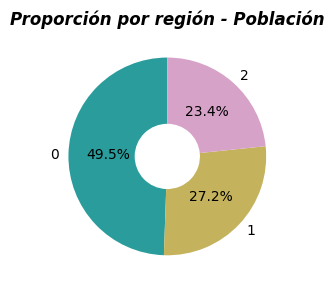

In [ ]:
pie_settlement(df, "Población")

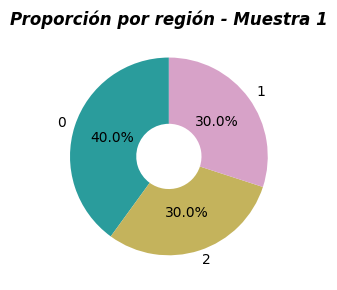

In [ ]:
pie_settlement(m1, "Muestra 1")

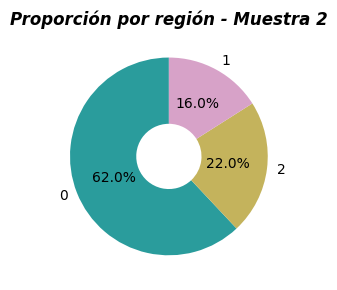

In [ ]:
pie_settlement(m2, "Muestra 2")

*  ### **¿Cómo podría influir esta distribución en las oportunidades económicas?**

La mayoría de los individuos, tanto de la población como en las muestras reside en **áreas rurales o asentamientos pequeños**. Esta distribución puede dejarnos ver la limitación del acceso a oportunidades no solo económicas sino educativas y de acceso a recursos públicos básicos. La alta concentración en zonas rurales puede indicarnos desafíos estructurales en términos de desarrollo económico y de movilidad social, teniendo en cuenta que la centralización de los recursos suele estar en las cuidades.



## **1.3. Histograma** - *Ingresos*






**NOTA:** *Se utilizaron tanto la regla de **Freedman-Diaconis** como la de **Scott**. Aunque Freedman-Diaconis suele ser la más recomendada para variables como el ingreso, la de Scott es nuestra favorita personal. Ya entrados en gastos decidimos incluir ambas, compararlas y observar cómo cambia la distribución de los datos según el número de intervalos.*

#### ***- Scott***

In [ ]:
#@title - *Código de la regla de Scott*
def calcular_bins_scott(data):
    ingresos = data['Income'].dropna()
    std_dev = np.std(ingresos)
    n = len(ingresos)
    bin_width = 3.5 * std_dev / np.cbrt(n)
    bins = int((ingresos.max() - ingresos.min()) / bin_width)
    return bins

bins_scott = calcular_bins_scott(df)
print("Bins óptimos según Scott:", bins_scott)

Bins óptimos según Scott: 25


In [ ]:
#@title - *Código de los histogramas (con Scott)*
def histograma_ingresos(data, titulo, color):
    plt.figure(figsize=(7, 4))
    sns.histplot(data['Income'], bins= bins_scott, kde=True, color=color)
    plt.title(f"Histograma de ingresos (Scott) - {titulo}", fontweight='bold', fontstyle='italic')
    plt.xlabel("Ingreso", fontweight='bold')
    plt.ylabel("Frecuencia", fontweight='bold')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()


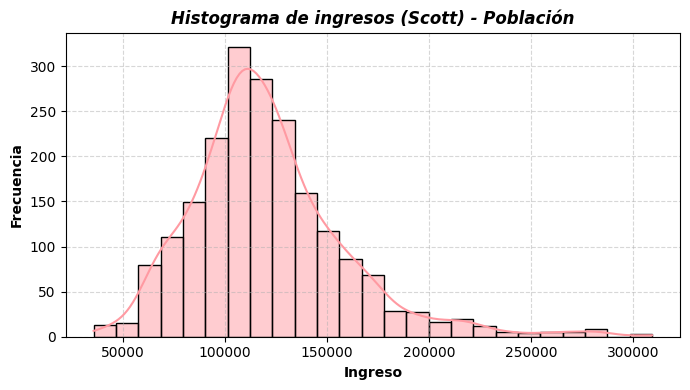

In [ ]:
histograma_ingresos(df, "Población", color='#FF9AA2')

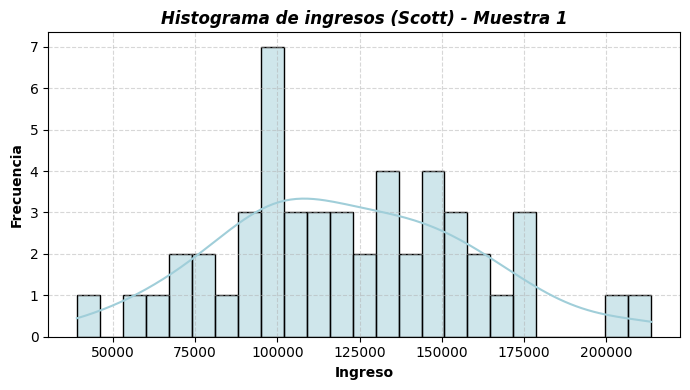

In [ ]:
histograma_ingresos(m1, "Muestra 1", color= '#A0CED9')

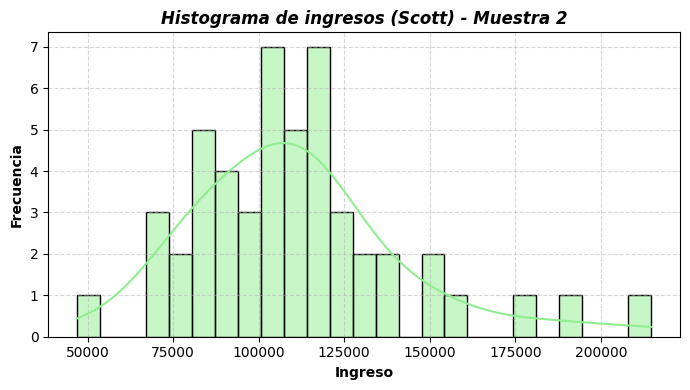

In [ ]:
histograma_ingresos(m2, "Muestra 2", color= "#90EE90")

#### ***- Freedman-Diaconis***

In [ ]:
#@title - *Código de la regla de Freedman-Diacons*
ingresos = df['Income'].dropna()

def calcular_bins_fd(data):
    ingresos = data['Income'].dropna()
    q75, q25 = np.percentile(ingresos, [75 ,25])
    iqr = q75 - q25
    n = len(ingresos)
    bin_width = 2 * iqr / np.cbrt(n)
    bins = int((ingresos.max() - ingresos.min()) / bin_width)
    return bins

bins_optimos = calcular_bins_fd(df)
print("Bins óptimos según Freedman-Diaconis:", bins_optimos)

Bins óptimos según Freedman-Diaconis: 42


In [ ]:
#@title - *Código de los histogramas (con FD)*
def histograma_ingresos(data, titulo, color):
    plt.figure(figsize=(7, 4))
    sns.histplot(data['Income'], bins= bins_optimos, kde=True, color=color)
    plt.title(f"Histograma de ingresos (Freedman - Diaconis) - {titulo}", fontweight='bold', fontstyle='italic')
    plt.xlabel("Ingreso", fontweight='bold')
    plt.ylabel("Frecuencia", fontweight='bold')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

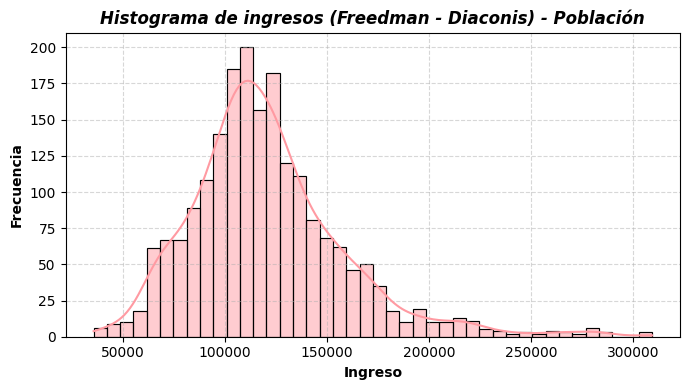

In [ ]:
histograma_ingresos(df, "Población", color='#FF9AA2')

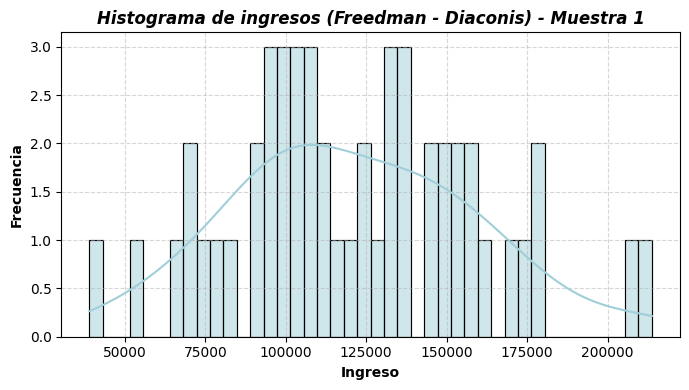

In [ ]:
histograma_ingresos(m1, "Muestra 1", color= '#A0CED9')

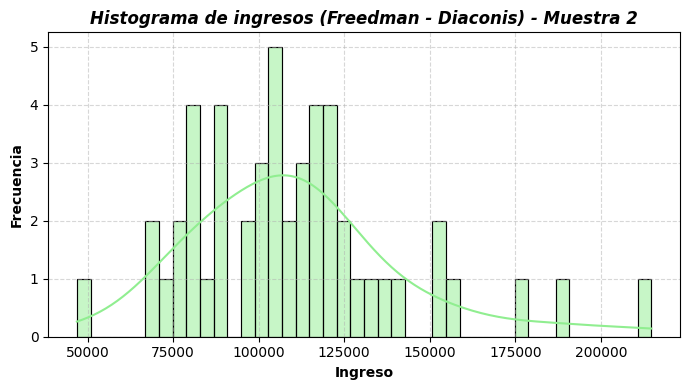

In [ ]:
histograma_ingresos(m2, "Muestra 2", color= "#90EE90")


* ### **¿La distribución es simétrica o asimétrica?**

    *   ***Scott:*** Evidenciamos que la distribución tanto para la población como para las muestras presenta una **asimetría positiva** (o sea, con **sesgo hacia la derecha**), aunque en las muestras presentan más variabilidad por ser más pequeñas conservan el patrón.

    - ***Freedman-Diaconis:*** Al generar mayor número de intervalos, tenemos una visión más detallada de la distribución. Nos permite observar mejor los picos y vacíos. Confirmamos el **sesgo hacia la derecha** y vemos que se mantiene incluso en las muestras.  




* ### **¿Qué nos indica esto sobre la desigualdad de ingresos?**

Vemos que la mayoría de personas se concentran en los tramos bajos y medios de ingreso, mientras que otros pocos se extienden hacia valores altos, hay una **desigualdad económica** algo evidente, en los histogramas de población la cola larga a la derecha es más evidente que confirma esa desigualdad, *muchos ganan poco y unos pocos ganan mucho más*.

###**CONCLUSIÓN DE USAR AMBAS REGLAS:**
 Ambos métodos muestran la **misma tendencia de desigualdad en la distribución de ingresos**, pero ***Freedman-Diaconis*** permite una visualización más **detallada**, nos fue útil para *detectar irregularidades o acumulaciones especificas*. ***Scott*** es más **suave y general**, nos permite hacer *interpretaciones más globales y comparaciones simples*.

## **1.4. Boxplot de ingresos** - *Por nivel educativo*

In [ ]:
#@title - *Código de los boxplot*
def boxplot_educacion_ingresos(data, nombre, color):
    orden = ['other / unknown', 'high school', 'university', 'graduate school']
    plt.figure(figsize=(7, 5))
    sns.boxplot(data=data, x='Education', y='Income', color=color, order=orden)
    plt.title(f"Ingreso por Nivel Educativo - {nombre}", fontweight='bold', fontstyle='italic')
    plt.xlabel("Nivel Educativo", fontweight='bold')
    plt.ylabel("Ingreso", fontweight='bold')
    plt.xticks(rotation=0)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

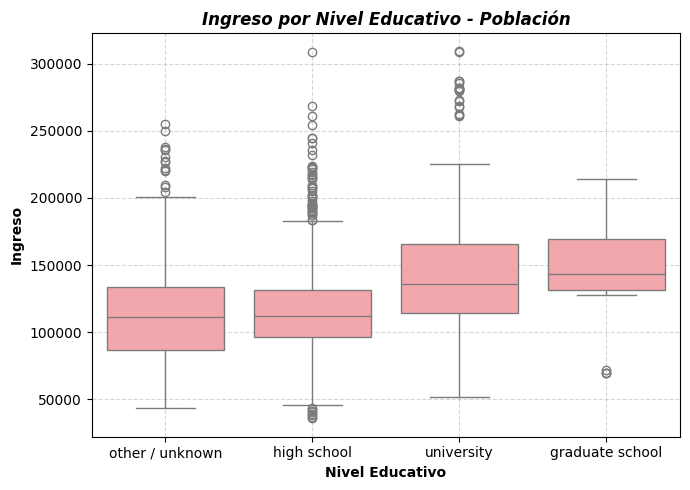

In [ ]:
boxplot_educacion_ingresos(df,"Población", color='#FF9AA2')

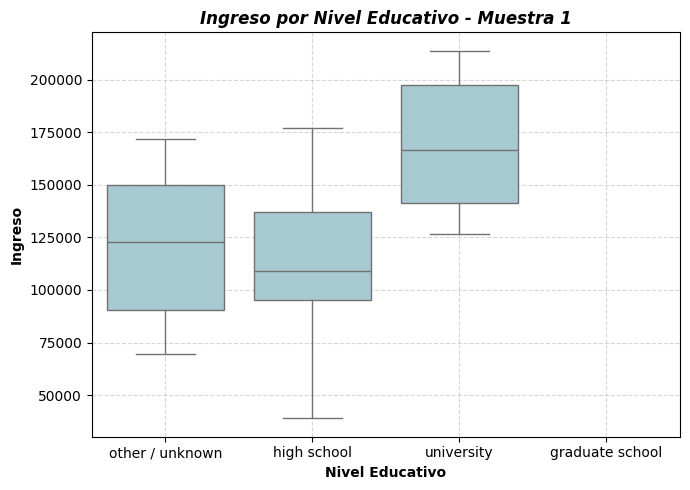

In [ ]:
boxplot_educacion_ingresos(m1,"Muestra 1", color= '#A0CED9')

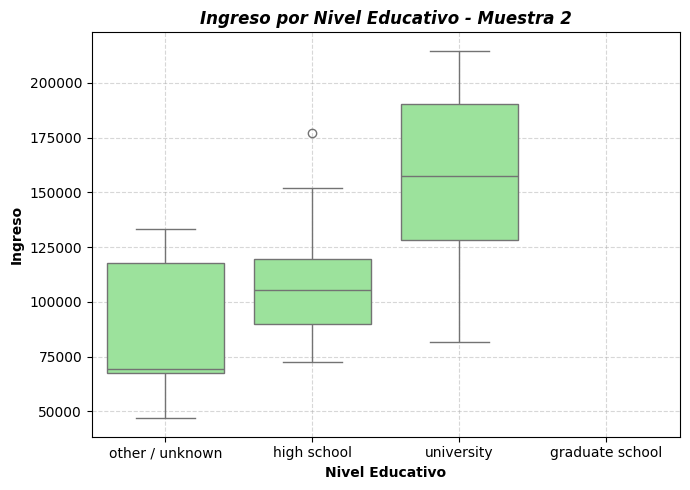

In [ ]:
boxplot_educacion_ingresos(m2,"Muestra 2", color= "#90EE90")


*  ### **¿Qué diferencias se observan entre grupos?**


*   ***Población:*** Están los **cuatro** niveles educativos. **Posgrado y universidad** muestran **ingresos más altos** en promedio que los otros grupos. Hay **muchos datos atípicos**, lo que nos indica mucha variabilidad. **Bachillerato** tiene una **mediana más baja y una gran dispersión**, lo cual reafirma la idea de que menos educación se asocia con *ingresos más bajos y menos predecibles.*

*   ***Muestra 1:*** Hay solo **tres** niveles educativos (ya no hay datos en posgrado). **Universidad** tiene una **mediana más alta** y **menos dispersión**, eso indica **ingresos más estables**. **Bachillerato** tiene una **mediana más baja** y una **distribución muy dispersa**.

* ***Muestra 2:*** Al igual que en la muestra 1, solo hay **tres** niveles educativos. **Universidad** de nuevo tiene la **mediana más alta**. La diferencia más clara es que a **más educación, mayor ingreso**.

  -- Algo a tener en cuenta es que en las muestras hay menos datos atípicos visibles porque el tamaño de es más pequeño (respecto a la población).



*  ### **¿Qué pueden inferir sobre el impacto de la educación en los ingresos?**

Hay una **relación positiva** entre el **nivel educativo y los ingresos**.

En la población total hay una clara tendencia de aumento del ingreso a medida que incrementa el nivel de educación, aunque con una alta variación y una gran presencia de datos atípicos. En ambas muestras se mantiene esta tendencia, aunque ya no hay datos de posgrado.


## **1.5. Gráfico de barras apiladas** - *Distribución de la variable sexo DENTRO de la variable nivel educativo*

In [ ]:
#@title - *Código de los gráficos de barras apiladas*
def barras_apiladas_educacion_sexo(data, nombre, colores):
    orden = ['other / unknown' ,'high school', 'university', 'graduate school']
    tabla = pd.crosstab(data['Education'], data['Sex']).reindex(orden)
    tabla.plot(kind='bar', stacked=True, color=colores, figsize=(5, 5))
    plt.title(f"Distribución de Sexo por Nivel Educativo - {nombre}", fontweight='bold', fontstyle='italic')
    plt.xlabel("Nivel Educativo", fontweight='bold')
    plt.ylabel("Cantidad", fontweight='bold')
    plt.xticks(rotation=0)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.legend(title="Sexo")
    plt.tight_layout()
    plt.show()


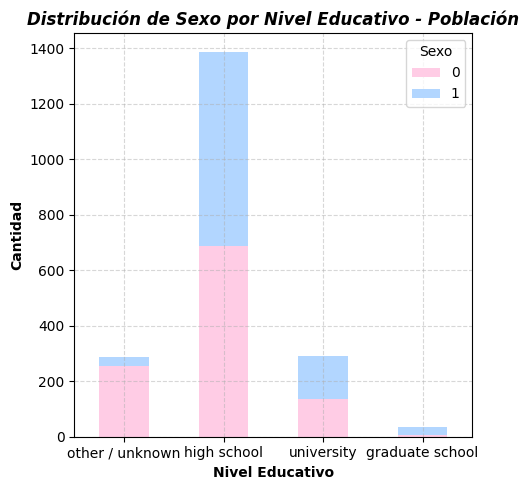

In [ ]:
barras_apiladas_educacion_sexo(df, "Población", colores=['#FFCCE5', '#B2D6FF'])

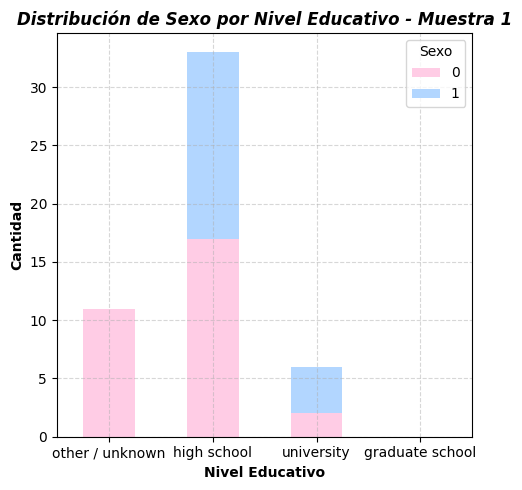

In [ ]:
barras_apiladas_educacion_sexo(m1, "Muestra 1", colores=['#FFCCE5', '#B2D6FF'])

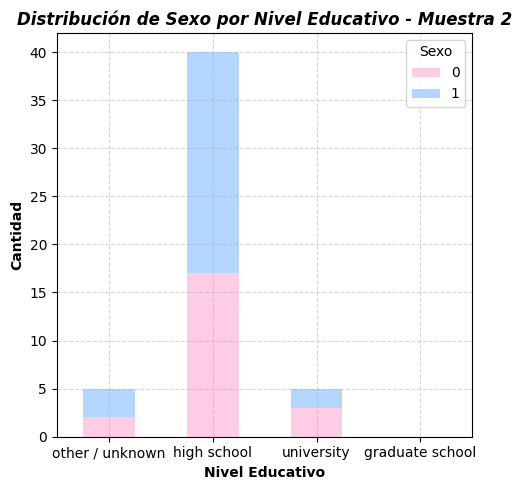

In [ ]:
barras_apiladas_educacion_sexo(m2, "Muestra 2", colores=['#FFCCE5', '#B2D6FF'])

***NOTA:***  Para el análisis se va a asumir que ***0 = Mujer*** y ***1 = Hombre***, ya que no se hizo especificación. Y se asignarán los colores estereotípicos ***Mujeres = Rosado*** y ***Hombres = Azul*** para facilidad del ejercicio.

* ###  **¿Qué podría decir de la diferencias entre hombres y mujeres en términos del nivel educativo?**

  Los gráficos muestran una **brecha de género** en los **niveles educativos** más **altos**. En los niveles **bajos**, la distribución por sexo es más "**equilibrada**" y con ligera mayoría de *mujeres*.  **Sin embargo**, en la universidad y especialmente en posgrado predominan los *hombres*.
  
  Podríamos asumir una **desigualdad** en el acceso a la educación superior que se afirma historicamente por una mayor presencia masculina.

  En la **muestra 2** los patrones cambian ligermente, hay mayor proporción de hombres en "otro" y en bachillerato y más mujeres en universidad.


* ### **¿Existe alguna relación entre el nivel ingreso y el sexo?  Realice los gráficos que soportan su afirmación.**

  Lo más lógico sería que **sí**, intuitivamente podrímos pensar que los hombres tienen ingresos más altos que las mujeres por todo el contexto estructural historico.

  Sin embargo, vamos a verificar esta hipótesis con tres gráficos:


  *   ***Boxplot (Ingresos según sexo):*** Para poder comparar la distribución de los ingresos entre mujeres y hombres.

  *   ***Barplot (Ingreso promedio según sexo):*** Para visualizar la diferencia en el ingreso promedio entre mujeres y hombres.

  *  ***Violinplot (Ingresos por sexo):*** Para ver cómo se distribuyen los ingresos (no solo los valores centrales) y podemos ver la dispersión en diferentes rangos de ingreso.





#### **1.5.1. Boxplot**: *Ingreso según sexo*

In [ ]:
#@title - *Código del boxplot - Ingreso según sexo*
def boxplot_ingreso_sexo(data, nombre):
    data = data.copy()
    data['Sex'] = data['Sex'].astype(int)

    plt.figure(figsize=(5, 5))
    sns.boxplot(data=data, x='Sex', y='Income', hue='Sex',
                palette={0: "#FFCCE5", 1: "#B2D6FF"}, dodge=False, legend=False)

    plt.title(f"Ingreso por Sexo - {nombre}", fontweight='bold', fontstyle='italic')
    plt.xlabel("Sexo", fontweight='bold')
    plt.ylabel("Ingreso", fontweight='bold')
    plt.xticks([0, 1], ['Mujer', 'Hombre'])
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()


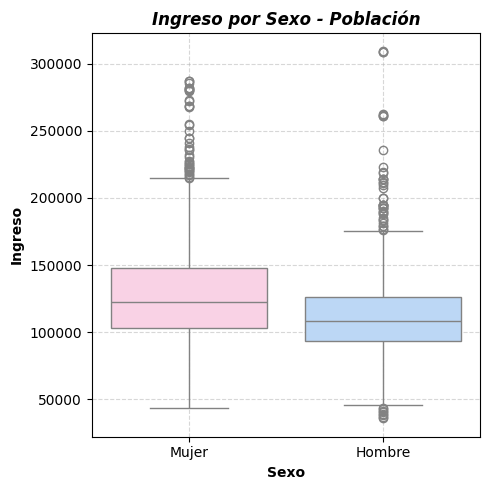

In [ ]:
boxplot_ingreso_sexo (df, "Población")

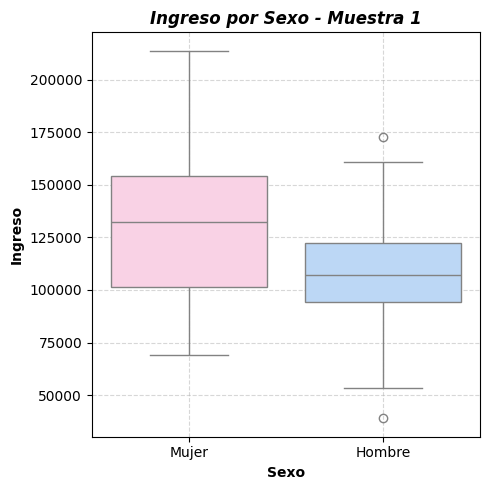

In [ ]:
boxplot_ingreso_sexo (m1, "Muestra 1")

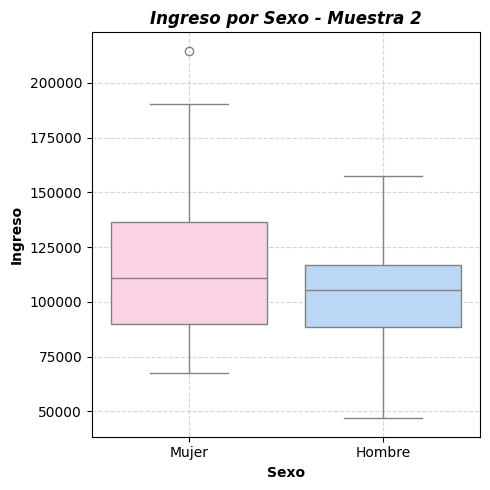

In [ ]:
boxplot_ingreso_sexo (m2, "Muestra 2")

**CONCLUSIÓN:** Según los gráficos tanto para la población como para las muestras vemos que las **mujeres** tienen una **mediana de ingreso más alta** que los hombres. Respecto a la **dispersión** observamos que las **mujeres** tienden a tener **más ingresos concentrados** **en niveles altos** en comparación a los hombres.

####**1.5.2. Barplot**: *Ingreso promedio según sexo*

In [ ]:
#@title - *Código del Barplot*
def barplot_promedio_sexo_ingreso(data, nombre):
    tabla = data.groupby('Sex')['Income'].mean().reset_index()
    plt.figure(figsize=(5, 5))
    sns.barplot(x='Sex', y='Income', hue='Sex', data=tabla, palette=["#FFCCE5", "#B2D6FF"], dodge=False, legend=False)
    plt.title(f"Ingreso Promedio según Sexo - {nombre}", fontweight='bold', fontstyle='italic')
    plt.xlabel("Sexo", fontweight='bold')
    plt.ylabel("Ingreso Promedio", fontweight='bold')
    plt.xticks([0, 1], ['Mujer', 'Hombre'])
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()


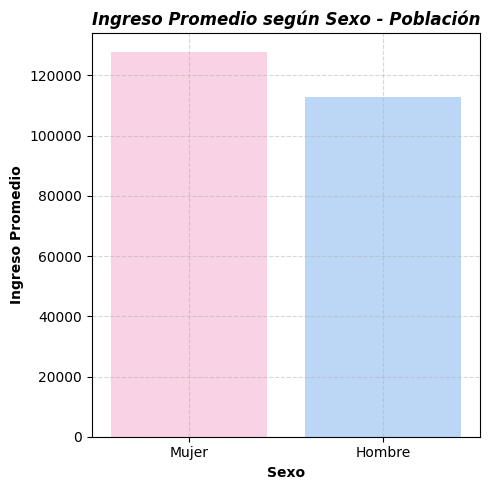

In [ ]:
barplot_promedio_sexo_ingreso(df, "Población")

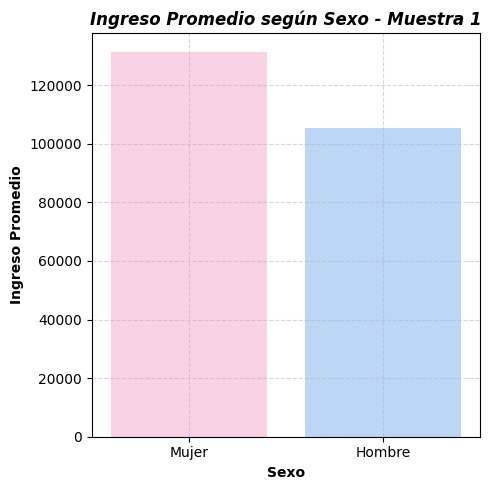

In [ ]:
barplot_promedio_sexo_ingreso(m1, "Muestra 1")

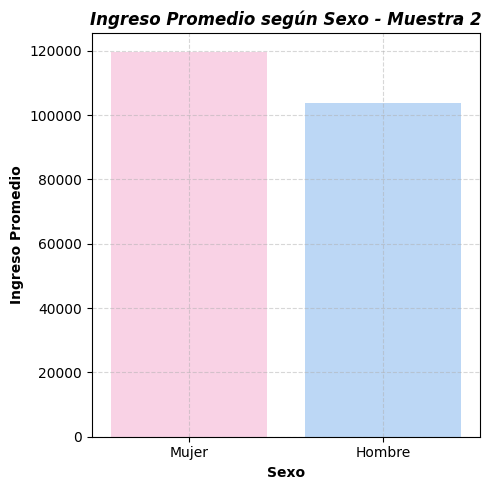

In [ ]:
barplot_promedio_sexo_ingreso(m2, "Muestra 2")

**CONCLUSIÓN:** Podemos observar en los gráficos que el ingreso promedio de las **mujeres** es **mayor** que el de los hombres en la población y ambas muestras. La diferencia es significativa pero no demasiado amplia.

####**1.5.3. Violinplot**: *Ingreso según sexo*

In [ ]:
#@title - *Código del Violinplot*
def violinplot_ingreso_sexo(data, nombre):
    data = data.copy()
    data['Sex'] = data['Sex'].astype(str)

    plt.figure(figsize=(5,5))
    sns.violinplot(x='Sex', y='Income', data=data, hue='Sex', palette={'0': "#FFCCE5", '1': "#B2D6FF"}, legend=False)
    plt.title(f"Ingreso por Sexo - {nombre}", fontweight='bold', fontstyle='italic')
    plt.xlabel("Sexo", fontweight='bold')
    plt.ylabel("Ingreso", fontweight='bold')
    plt.xticks([0, 1], ['Mujer', 'Hombre'])
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()


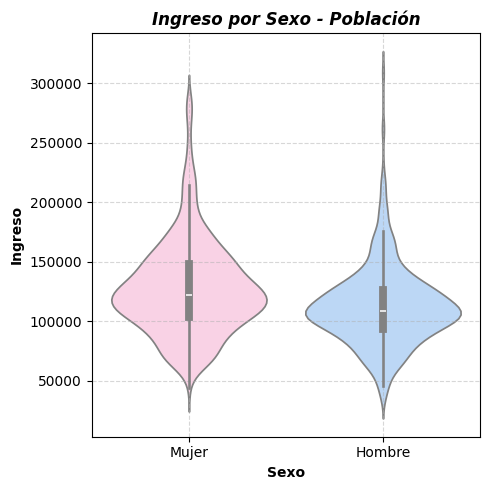

In [ ]:
violinplot_ingreso_sexo(df, "Población")

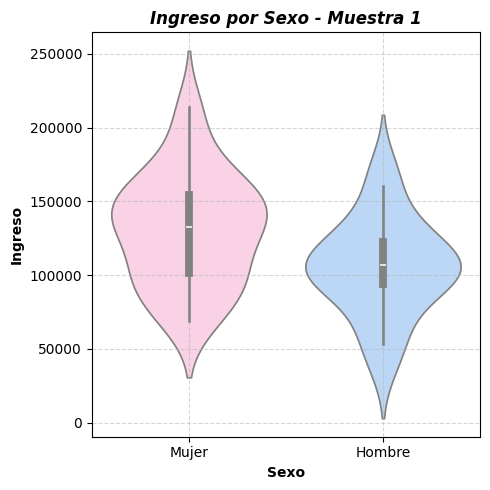

In [ ]:
violinplot_ingreso_sexo(m1, "Muestra 1")

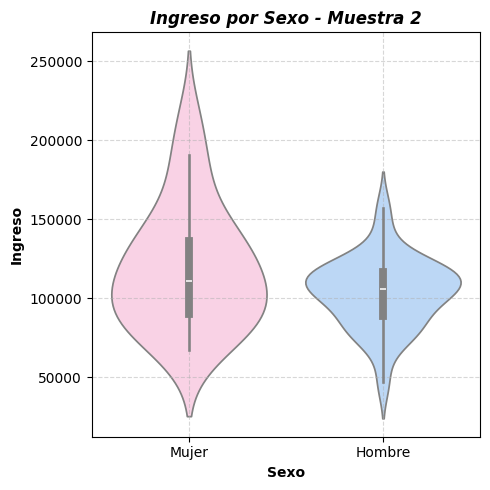

In [ ]:
violinplot_ingreso_sexo(m2, "Muestra 2")

**CONCLUSIÓN:** En los gráficos vemos que la distribución de ingresos de las **mujeres** tiene **mayor concentración** en **niveles altos**, la distribución de los ingresos de los hombres se concentra más en rangos más bajos.

### **CONCLUSIÓN GENERAL**
Los tres gráficos confirman la hipotesis inicial: **Existe una relación entre el ingreso y el sexo.**

**Pero** sorpresivamente **son las mujeres** las que tienen **ingresos ligeramente superiores** a los hombres tanto en la población cómo en ambas muestras.

# ***2. Medidas de Tendencia Central***


---



## **2.1. Media, mediana y moda** - *Ingresos*

In [ ]:
#@title - *Código de la media, mediana y moda*
def medidas_centrales(data, titulo):
    media = data['Income'].mean()
    mediana = data['Income'].median()
    moda = data['Income'].mode()[0] if not data['Income'].mode().empty else "No hay moda"

    negrita_cursiva = '\033[1;3m'
    reset = '\033[0m'

    print(f"{negrita_cursiva}{titulo}:{reset}")
    print(f"{'-'*30}")
    print(f"- Media:    {media:,.2f}")
    print(f"- Mediana:  {mediana:,.2f}")
    print(f"- Moda:     {moda:,}" if isinstance(moda, (int, float)) else f"- Moda: {moda}")
    print("\n")


In [ ]:
medidas_centrales(df, "Población")
medidas_centrales(m1, "Muestra 1")
medidas_centrales(m2, "Muestra 2")

Población:
------------------------------
- Media:    120,954.42
- Mediana:  115,548.50
- Moda: 69487


Muestra 1:
------------------------------
- Media:    120,976.68
- Mediana:  118,763.00
- Moda: 38980


Muestra 2:
------------------------------
- Media:    110,691.02
- Mediana:  107,273.50
- Moda: 46865




*  ### **¿Cuál consideran más representativa y por qué?**

  Para este caso: **La mediana** es más precisa
  
  Porque la mediana es menos sensible a *valores extremos* o *atípicos* que son bastante comunes en los **ingresos**.
  
  Como vimos anteriormente los **ingresos** tienen **distribucion asimétrica positiva** (a la derecha) entonces **pocas** personas con **ingresos altos** **elevan** la **media**.


##**2.2. Diferencia** - *Media y mediana*

In [ ]:
#@title - *Código diferencia media y mediana*
def medidas_centrales(data, titulo):
    media = data['Income'].mean()
    mediana = data['Income'].median()

    if media > mediana:
        sesgo = "Positivo (sesgo a la derecha)"
        interpretacion = "La media es mayor que la mediana - hay valores altos extremos que elevan la media."
    elif media < mediana:
        sesgo = "Negativo (sesgo a la izquierda)"
        interpretacion = "La mediana es mayor que la media - hay valores bajos extremos que reducen la media."
    else:
        sesgo = "Distribución simétrica"
        interpretacion = "La media y la mediana son iguales - distribución aproximadamente simétrica."

    negrita_cursiva = '\033[1;3m'
    reset = '\033[0m'

    print(f"{negrita_cursiva}{titulo}:{reset}")
    print(f"{'-'*30}")
    print(f"- Media:    {media:,.2f}")
    print(f"- Mediana:  {mediana:,.2f}")
    print(f"{negrita_cursiva}- Sesgo:    {negrita_cursiva}{sesgo}{reset}")
    print(f"- Interpretación: {interpretacion}")
    print("\n")


In [ ]:
medidas_centrales(df, "Población")
medidas_centrales(m1, "Muestra 1")
medidas_centrales(m2, "Muestra 2")

Población:
------------------------------
- Media:    120,954.42
- Mediana:  115,548.50
- Sesgo:    Positivo (sesgo a la derecha)
- Interpretación: La media es mayor que la mediana - hay valores altos extremos que elevan la media.


Muestra 1:
------------------------------
- Media:    120,976.68
- Mediana:  118,763.00
- Sesgo:    Positivo (sesgo a la derecha)
- Interpretación: La media es mayor que la mediana - hay valores altos extremos que elevan la media.


Muestra 2:
------------------------------
- Media:    110,691.02
- Mediana:  107,273.50
- Sesgo:    Positivo (sesgo a la derecha)
- Interpretación: La media es mayor que la mediana - hay valores altos extremos que elevan la media.




* ###  **¿Qué implica sobre la distribución de los ingresos?**

  La media es mayor que la mediana en todos los casos. La distribución está sesgada positivamente (o sea, a la derecha), nos podría indicar que existen personas con ingresos muy elevados que aumentan el valor de la media respecto a la mediana. **Los ingresos no están distribuidos simetricamente.**

  - (*Habíamos llegado a esta conclusión anteriormente con los histogramas*)



# ***3. Medidas De Dispersión***


---


## **3.1. Rango, varianza, desviación estándar y coeficiente de variación** - *Ingresos*

In [ ]:
#@title - *Código de para medidas de dispersión*
def dispersion(data, titulo):
    rango = data['Income'].max() - data['Income'].min()
    varianza = data['Income'].var()
    desviacion = data['Income'].std()
    coef_variacion = desviacion / data['Income'].mean() * 100

    negrita_cursiva = '\033[1;3m'
    reset = '\033[0m'

    print(f"{negrita_cursiva}{titulo}:{reset}")
    print(f"{'-'*30}")
    print(f"- Rango:                {rango:,.2f}")
    print(f"- Varianza:             {varianza:,.2f}")
    print(f"- Desviación estándar:  {desviacion:,.2f}")
    print(f"- Coeficiente de variación: {coef_variacion:.2f}%")
    print("\n")

In [ ]:
dispersion(df, "Población")
dispersion(m1, "Muestra 1")
dispersion(m2, "Muestra 2")

Población:
------------------------------
- Rango:                273,532.00
- Varianza:             1,452,282,518.38
- Desviación estándar:  38,108.82
- Coeficiente de variación: 31.51%


Muestra 1:
------------------------------
- Rango:                174,788.00
- Varianza:             1,424,194,822.10
- Desviación estándar:  37,738.51
- Coeficiente de variación: 31.19%


Muestra 2:
------------------------------
- Rango:                167,867.00
- Varianza:             986,092,321.24
- Desviación estándar:  31,402.11
- Coeficiente de variación: 28.37%




* ###  **¿Qué revelan estas medidas sobre la dispersión de ingresos?**

  Las medidas de dispersión nos muestran que los ingresos tienen una alta variabilidad.

  El **rango** muestra que existe una amplia diferencia entre los ingresos más altos y más bajos, hay personas que ganan mucho más que otras.
  
  La **varianza** y la **desviación estándar** reflejan que los ingresos están muy dispersos alrededor de la media, o sea, no todos ganan lo mismo y hay bastante variabilidad.

  El **coeficiente de variación** confirma que la dispersión relativa es alta (desde más de 25% ya se considera alto).






## **3.2. ¿Cómo la dispersión de los ingresos puede reflejar la desigualdad económica?**

  Una alta dispersión refleja una **gran diferencia** de **ingresos** entre las personas, lo cual es caracteristico de una **estructura económica desigual**.

  El hecho de que la **desviación estándar** y el **coeficiente de variación** sean **elevados** indica que no todos tienen acceso a los mismos recursos, o sea, hay **diferencias marcadas** en el **nivel de ingreso** entre las personas.

  Al comparar la población y las muestras, aunque la dispersión es levemente menor sigue reflejando la misma tendencia de desigualdad en los datos.

  *La muestra 1 es más representativa de la realidad de la población, en este caso.*




# ***4. Desigualdad de Chebyshev***

## **4.1. Con la desviación estándar calculada**
 *¿Qué porcentaje mínimo de datos se espera dentro de dos (2) desviaciones estándar según la desigualdad de Chebyshev?*

In [ ]:
#@title - *Código de la desigualdad de Chebyshev*
def chebyshev(data, titulo):
    media = data['Income'].mean()
    std = data['Income'].std()
    k = 2
    inferior = media - k * std
    superior = media + k * std
    porcentaje_real = ((data['Income'] >= inferior) & (data['Income'] <= superior)).mean() * 100
    minimo_chebyshev = (1 - 1/k**2) * 100

    negrita_cursiva = '\033[1;3m'
    reset = '\033[0m'

    print(f"{negrita_cursiva}{titulo}:{reset}")
    print(f"{'-'*40}")
    print(f"{negrita_cursiva} - Chebyshev mínimo (k=2): {minimo_chebyshev:.2f}%{reset}")
    print(f"- % real dentro de 2 desv. estándar: {porcentaje_real:.2f}%")
    print("\n")

In [ ]:
chebyshev(df, "Población")
chebyshev(m1, "Muestra 1")
chebyshev(m2, "Muestra 2")

Población:
----------------------------------------
 - Chebyshev mínimo (k=2): 75.00%
- % real dentro de 2 desv. estándar: 95.45%


Muestra 1:
----------------------------------------
 - Chebyshev mínimo (k=2): 75.00%
- % real dentro de 2 desv. estándar: 94.00%


Muestra 2:
----------------------------------------
 - Chebyshev mínimo (k=2): 75.00%
- % real dentro de 2 desv. estándar: 92.00%




**Ese 75%** representa el **mínimo garantizado**, o sea, bajo cualquier condición, al menos el 75% del ingreso debe encontrarse en el rango comprendido entre *μ−2σ* y *μ+2σ* (dos desviaciones estandar).

Cómo el **porcentaje real** es **mucho mayor** se nos hablaría de menos dispersión y mayor concentración del ingreso entorno a la media.

## **4.2. Comparación resultado** con *porcentaje real observado*

In [ ]:
#@title - *Código de la comparación*
def chebyshev_comparativo(datasets, nombres):
    k = 2
    minimo_chebyshev = (1 - 1/k**2) * 100

    negrita_cursiva = '\033[1;3m'
    reset = '\033[0m'

    print(f"\033[1;3mComparativo Chebyshev (k=2):\033[0m")
    print(f"{'-'*50}")
    print(f"{'Grupo':<15}{'Mínimo (%)':<15}{negrita_cursiva}{'Real Observado (%)'}{reset}")
    print(f"{'-'*50}")

    for data, nombre in zip(datasets, nombres):
        media = data['Income'].mean()
        std = data['Income'].std()
        inferior = media - k * std
        superior = media + k * std
        porcentaje_real = ((data['Income'] >= inferior) & (data['Income'] <= superior)).mean() * 100

        print(f"{nombre:<15}{minimo_chebyshev:<15.2f}{negrita_cursiva}{porcentaje_real:.2f}{reset}")

    print("\n")

In [ ]:
chebyshev_comparativo([df, m1, m2], ["Población", "Muestra 1", "Muestra 2"])

Comparativo Chebyshev (k=2):
--------------------------------------------------
Grupo          Mínimo (%)     Real Observado (%)
--------------------------------------------------
Población      75.00          95.45
Muestra 1      75.00          94.00
Muestra 2      75.00          92.00




Al comparar los reales con los obtenidos con la desigualdad observamos que **nuestros datos** tienden a **concentrarse mucho más alrededor de la media**. El comportamiento real de los datos superó con creces el mínimo esperado, podríamos decir que, los ingresos no están en realidad tan dispersos como se podría pensar inicialmente y no hay tantos valores extremos.

Pero, algo a tener en cuenta es que a lo largo del análisis hemos visto signos evidentes de desigualdad y que la media es muy sensible a valores extremos. Que la mayoría de los datos estén alrededor de la media **no significa que la distribución sea equitativa o justa.**

Los altos porcentajes que observamos no niegan la desigualdad, sino que reflejan que la mayor parte de los datos están agrupados en un rango determinado y ya.

*  ### **¿Qué utilidad tiene Chebyshev en contextos económicos reales?**

  Principalmente nos permite analizar la **dispersión de los datos** **sin asumir que se distribuyen de una forma especifica**. Es especialmente útil con datos que no necesariamente siguen una campana de Gauss (distribución normal).

  ***Por ejemplo:***

  **- Estudio de precios en mercados regionales:** Si un producto tiene un **precio promedio** pero **la mayoría de los precios reales están lejos de este** que puede deberse a problemas de acceso, de transporte o abuso del poder del mercado.

  **- Análisis de ingresos o salarios** (como en el ejercicio): Nos ayuda a saber qué tan dispersos están los ingresos respecto al promedio, aunque no tengamos una distribución simétrica. Facilita detectar **concentración de riqueza o desigualdad** (en especial cuando tenemos informaión limitada o escaza).

  **- Indicadores económicos** (Inflación, desempleo o crecimiento): Si evaluamos estos indicadores en varias regiones de un país nos ayuda a ver **si hay muchas regiones que se alejan de lo esperado** e identificar desequilibrios importantes.

  **- Evaluación de políticas públicas:** Por ejemplo en el caso de los subsidios, analizar **qué tan uniforme fue su efecto** entre diferentes poblaciones.



#***5. Interpretación y Reflexión***

##**5.1.** **Preguntas**

*  ### **¿Qué relación observan entre nivel educativo e ingresos?**

  A lo largo del análisis identificamos una relación directa: **A mayor nivel educativo, mayores ingresos**. Esto confimaría la hipotésis popular de que la educación es un factor clave para mejorar las condiciones económicas y por ende la calidad de vida de las personas.

  Sin embargo, **esa relación no es tan lineal cómo se esperaría**, si bien el nivel eductivo impacta positivamente el ingreso, **hay una desigualdad de base** que afecta no solo el acceso a la educación superior sino que persiste incluso en quienes tienen niveles educativos similares.

  Esto podría sugerir que el acceso a mejores ingresos **no solo depende de la educación** sino de otras condiciones estructurales (como el tipo de ocupación, el lugar de residencia e incluso el género).

* ###  **¿Qué políticas públicas podrían diseñarse con base en estos hallazgos?**

*(Las propuestas cuentan con sus respectivas medidas específicas porque en la práctica las políticas públicas deben plantearse desde su aplicabilidad concreta)*

  ***1. Fortalecimiento de la educación técnica y superior con enfoque territorial:***
  
  En el análisis observamos no solo que entre más alto el nivel educativo mejores ingresos sino que la mayoría de la población se encuentra ubicada en áreas rurales o asentamientos pequeños, que suelen tener una menor cobertura educativa.

  La educación pueden ser un mecanismo de movilidad social, pero solo si las condiciones para hacerlo están garantizadas para todos los territorios.

  - **Creación de centros de formación técnica en zonas rurales con enfoque en los sectores productivos locales**: Aunque en el ejercicio no se distingue explicitamente la formación técnica, en la realidad es una vía importante para las personas que no pueden costear una educación universitaria.

  - **Becas integrales que cubran sostenimiento y transporte para estudiantes de bajos recursos**: Ya que los costos indirectos son una de las principales causas de deserción educativa.

  - **Alianzas entre universidades públicas y gobiernos locales para ofertar programas virtuales o semipresenciales**, *con dotación de equipos si es necesario*: Nos permite ampliar la cobertura educativa sin exigir desplazamientos permanentes.


  
  ***2. Integración educativa-productiva con enfoque interseccional:***

  La educación no debe pensarse solo como una herramienta individual de ascenso social, sino como motor de desarrollo comunitario. La idea es articular formación, empleabilidad y justicia social para estos territorios que son históricamente marginados.

  El objetivo no es unicamente formar personas con titulos, sino generar condiciones para que las personas puedan tener medios de vida dignos sin verse obligados a abandonar su territorio.

  - **Identificación y fortalecimiento de sectores estratégicos mediante participación cuidadana:** Identificamos las cadenas productivas, los saberes locales y vocaciones de cada región para que la oferta educativa responda a esas realidades.

  - **Incentivos de contratación local**: Ofrecer bonificaciones fiscales o subsidios para las empresas que contraten personas de territorios marginados, especialmente si han sido formadas en programas públicos.

  - **Sistemas de acreditación de saberes empíricos**: Generar programas que permitan que personas con experiencia en oficios, cuidado, agricultura, economía popular y demás, puedan certificar sus conocimientos para acceder a mejores ingresos y/o continuar con sus estudios.

## **5.2. Propuestas**

 *¿Qué dos medidas podrían ayudar a reducir la desigualdad observada en los datos?*

Puede que la educación mejore los ingresos, pero no elimina completamente las brechas que siguen generando desigualdades estructurales.

Más allá de lo planteado en las políticas públicas, proponemos dos medidas complementarias:

  **- Redistribuir no solo la riqueza, sino las oportunidades.**

  No basta con ofrecer subsidios si el acceso a derechos básicos como salud, educación, transporte o empleo sigue dependiendo del territorio en el que nacemos.

   Es fundamental invertir más y mejor en las regiones históricamente excluidas, marcadas por infraestructura deficiente, servicios precarios y barreras sostenidas al bienestar.

  **- Ingresos basados en trabajo decente.**

  Muchas ocupaciones esenciales (como el trabajo agrícola o doméstico) siguen estando mal remuneradas y precarizadas, incluso cuando quienes las ejercen cuentan con experiencia o formación.

 Por eso, se requiere una revisión del salario mínimo rural y de los sistemas de contratación, desde un enfoque diferencial que garantice no solo trabajo sino condiciones dignas, protección social y reconocimiento económico a sectores tradicionalmente excluidos.



## **5.3. Reflexión metodológica**

*  ### **¿Qué limitaciones tiene este conjunto de datos?**

  - **Falta de perspectiva interseccional,** aunque se incluye el sexo y el estado civil, faltan variables como la **pertenencia a grupos éticos o raciales, identidad de género o condiciones de discapacidad** Sin esto, no podemos analizar correctamente como se entrelazan las diferentes desigualdades. No es lo mismo ser una mujer afro en una zona rural que un hombre blanco en la ciudad, incluso si tienen el mismo nivel educativo.

  - **Territorio como categoría y no como experiencia social,** el lugar de residencia se mide por su tamaño, pero eso **no captura la vivencia real** en ellos: si hay conectividad, acceso a servicios públicos o incluso conflictos sociales. Además, **no se incluye información sobre su localización** georgráfica exacta, un asentamiento pequeño puede ser cercano a la cuidad o estar completamente aislado, y eso cambia radicalmente las oportunidades.  

  - **Ausencia de variables estructurales,** no tenemos datos especificos sobre la tenencia de tierra, redes de capital social o el nivel educativo de los padres. Esto limita el análisis porque **no podemos evaluar brechas que van más allá de los logros individuales**, que están en condiciones heredadas o estructurales que les predisponen desde el inicio de la vida.

  - **Visión reducida de la educación,** el nivel educativo se mide por el titulo alcanzado, pero no se dice nada sobre **la calidad de esa formación**: el tipo de institución (si fue pública o privada) o las condiciones del acceso. Se pierde de vista la brecha que existe entre un titulo universitario obtenido en contextos privilegiados y otro alcanzado en condiciones precarias.

*  ### ***¿Qué otras variables deberían considerarse en un análisis más completo?***

  Aparte de las planteadas en las limitaciones propondríamos:

  - **Condiciones del hogar:** Número de dependientes o carga de cuidado. Tener hijos, personas mayores o con discapacidad impacta las posibilidades de trabajar o estudiar (especialmente en mujeres).

  - **Migración o movilidad:** Pueden haber personas desplazadas o migrantes y sus vivencias no se reflejan si solo analizamos su situación actual. Saber de dónde vienen y por qué decidieron (o tuvieron que) moverse aporta contexto historico y social desde un ángulo diferente.

  - **Trayectorias de discriminación:** Si la persona ha experimentado discriminación (por su sexo, orientación sexual, étnia, raza, etc.) podría ayudarnos a relacionar esto con sus opotunidades de acceso laboral y por ende ingresos.

  - **Condiciones del trabajo:** Dos personas pueden ser empledos calificados, pero una puede tener un contrato a término indefinido y la otra estar vinculada por prestación de servicios. Saber sobre su tipo de contrato, acceso a prestaciones sociales, horas laborales y estabilidad, más allá que solo su cargo.

  - ***BONUS*** - **Percepción de bienestar:** No todo debe ser dinero, saber cómo las personas perciben su situación económica o su nivel de satisfacción vital (la suficiencia de su ingreso, el nivel de estrés financiero o sus expectativas) no solo nos da una perspectiva más subjetiva sino que nos permite entender su toma de decisiones y sus autolimitaciones. Puede explicar por qué sigue habiendo desigualdad si las variables objetivas muestras avance y no hay una explicación inmediata en los números. ;)

#***CONCLUSIÓN GRUPAL***



A lo largo del análisis estadístico, logramos identificar una distribución desigual del ingreso en función del nivel educativo, que resultó ser el factor más influyente: quienes tienen formación universitaria tienden a tener mayores ingresos que los que cursaron unicamente bachillerato o niveles inferiores. Los datos támbien mostraron que, en esta base de datos, las mujeres tienen en promedio ingresos levemente superiores a los de los hombres, lo cual abrió la puerta a cuestionarnos prejuicios comunes y a reconocer que la desigualdad no siempre se comporta como se espera.

Este tipo de análisis es fundamental en materia económica porque nos permite observar patrones a partir la evidencia concreta, evitando caer en supuestos generalizados. Además, trabajar en equipo enriqueció las interpretaciones, cada uno caportó desde su experiencia en materias anteriores, lo que facilitó formular preguntas más amplias y contrastar ideas desde distintos enfoques.

Comparando la población total con cada una de las muestras, notamos que ambas reflejan de manera general las tendencias principales, aunque presentan ligeras diferencias en la dispersión y los valores extremos. Si bien ninguna muestra replica a la perfección a la población y de un enfoque a otro una era más precisa que la otra, la muestra 1 se aproxima más a la distribución general de ingresos, por lo que podríamos decir que en este caso, es la más representativa.

***El desarrollo del ejercicio no solo nos permitió comprender la utilidad técnica de la estadística, sino también su importancia dentro de nuestras distintas áreas de formación.***